## Gaussian Basis Function

The goal is to use Gausian basis function instead of polynomial basis function. Below is a function of this kind:
<br>
$\phi_{j}(x) = exp(\frac{-(x - \mu_{j})^{2}}{2\sigma^{2}})$
<br>
The $\sigma$ is spacing between the basis functions that combine to form the model. The scaling factor is not included because the weights in the model will take care of squeezing or extending the gaussian basis function.
<br>
Advantages:
<br>
- The basis function is non-zero over a very small interval and zero elsewhere. This will generate a very sparse design matrix with lots of zeros.

In [1]:
from sklearn.base import BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)


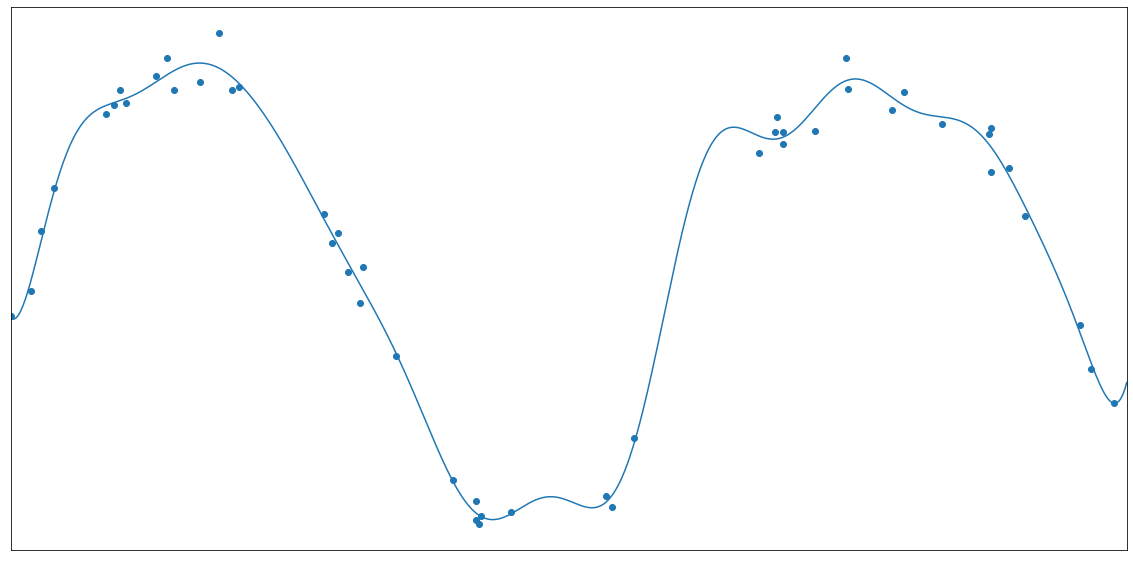

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
gauss_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.figure(figsize=(20,10))
plt.xticks([]); plt.yticks([])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);